In [1]:
import geopandas as gpd
import shapely
import matplotlib.pyplot as plt

In [27]:
# Load point data
pumps = gpd.read_file('../../data/csds/snow7/pumps.shp')
# Load building blocks
blocks = gpd.read_file('../../data/dani/polys.shp')

In [129]:
pumps['buffer']=pumps.buffer(200)

In [131]:
pumps

,ID,x,y,name,geometry,buffer
0,1,529396.539395,181025.063047,Broad St Pump,POINT (529396.539 181025.063),"POLYGON ((529596.539 181025.063, 529595.576 18..."
1,2,529192.537868,181079.391380,Great Malborough Pump,POINT (529192.538 181079.391),"POLYGON ((529392.538 181079.391, 529391.575 18..."
2,3,529183.739766,181193.735013,Ramilies Place Pump,POINT (529183.740 181193.735),"POLYGON ((529383.740 181193.735, 529382.777 18..."
3,5,529613.205238,180896.804121,Rupert St Pump,POINT (529613.205 180896.804),"POLYGON ((529813.205 180896.804, 529812.242 18..."
4,6,529453.585995,180826.353152,Brewer St Pump,POINT (529453.586 180826.353),"POLYGON ((529653.586 180826.353, 529652.623 18..."
5,8,529296.104419,180794.849037,Warwick St Pump,POINT (529296.104 180794.849),"POLYGON ((529496.104 180794.849, 529495.141 18..."


## Difference

<AxesSubplot:>

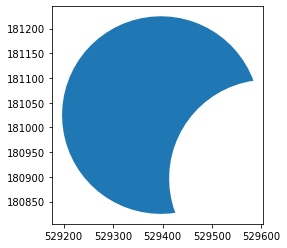

In [147]:
#similar to Distance operations above
bufA=pumps[pumps['name']=='Broad St Pump']['buffer'].squeeze()
bufB=pumps[pumps['name']=='Rupert St Pump']['buffer'].squeeze()

AdiffB = bufA.difference(bufB)
gpd.GeoSeries(AdiffB).plot()

<AxesSubplot:>

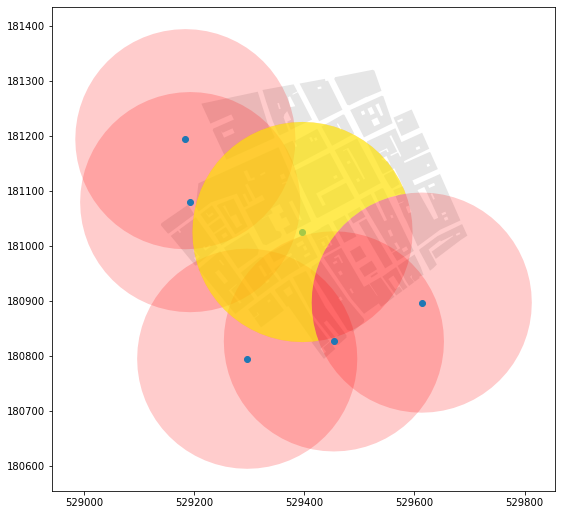

In [158]:
f, ax = plt.subplots(1, figsize=(9, 9))
blocks.plot(ax=ax, facecolor='0.9', linewidth=0)
pumps['buffer'].plot(ax=ax, linewidth=0, facecolor='red', alpha=0.2)
pumps['geometry'].plot(ax=ax)
gpd.GeoSeries(AdiffB).plot(ax=ax, facecolor='yellow', alpha=0.6)

<AxesSubplot:>

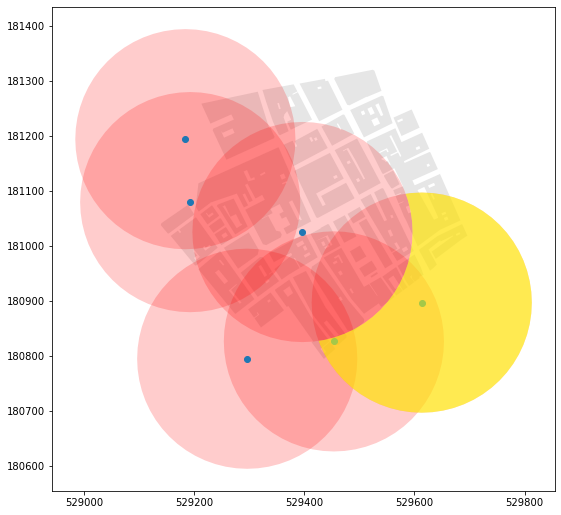

In [157]:
BdiffA = bufB.difference(bufA)

f, ax = plt.subplots(1, figsize=(9, 9))
blocks.plot(ax=ax, facecolor='0.9', linewidth=0)
pumps['buffer'].plot(ax=ax, linewidth=0, facecolor='red', alpha=0.2)
pumps['geometry'].plot(ax=ax)
gpd.GeoSeries(BdiffA).plot(ax=ax, facecolor='yellow', alpha=0.6)


<AxesSubplot:>

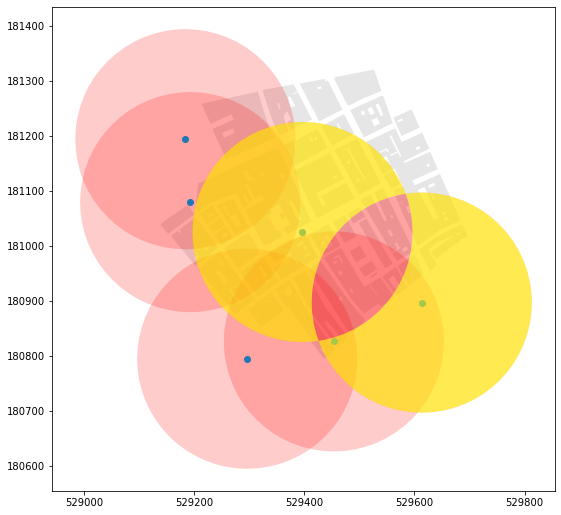

In [159]:
AsdB = bufA.symmetric_difference(bufB)

f, ax = plt.subplots(1, figsize=(9, 9))
blocks.plot(ax=ax, facecolor='0.9', linewidth=0)
pumps['buffer'].plot(ax=ax, linewidth=0, facecolor='red', alpha=0.2)
pumps['geometry'].plot(ax=ax)
gpd.GeoSeries(AsdB).plot(ax=ax, facecolor='yellow', alpha=0.6)

## Intersection

<AxesSubplot:>

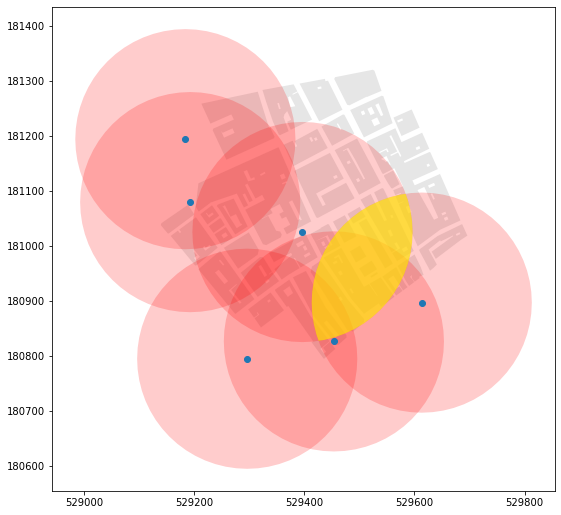

In [156]:
AintB = bufA.intersection(bufB)

f, ax = plt.subplots(1, figsize=(9, 9))
blocks.plot(ax=ax, facecolor='0.9', linewidth=0)
pumps['buffer'].plot(ax=ax, linewidth=0, facecolor='red', alpha=0.2)
pumps['geometry'].plot(ax=ax)
gpd.GeoSeries(AintB).plot(ax=ax, facecolor='yellow', alpha=0.6)

## Union

<AxesSubplot:>

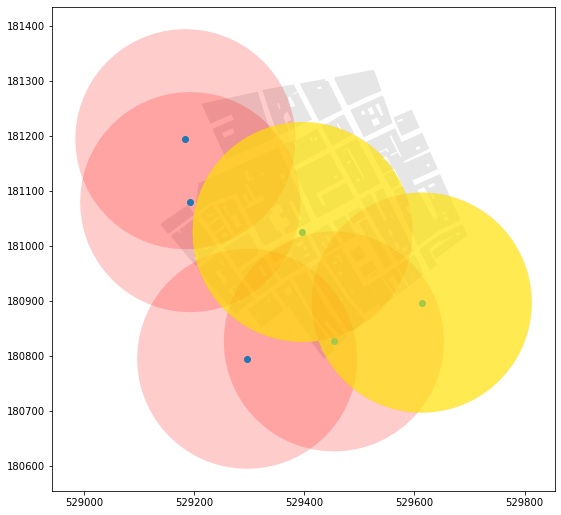

In [160]:
AunionB = bufA.union(bufB)

f, ax = plt.subplots(1, figsize=(9, 9))
blocks.plot(ax=ax, facecolor='0.9', linewidth=0)
pumps['buffer'].plot(ax=ax, linewidth=0, facecolor='red', alpha=0.2)
pumps['geometry'].plot(ax=ax)
gpd.GeoSeries(AunionB).plot(ax=ax, facecolor='yellow', alpha=0.6)

<AxesSubplot:>

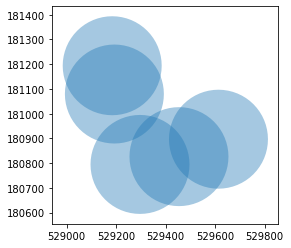

In [168]:
otherBuffs = pumps[pumps['name']!='Broad St Pump']['buffer'].squeeze()
gpd.GeoSeries(otherBuffs).plot(alpha=0.4)

<AxesSubplot:>

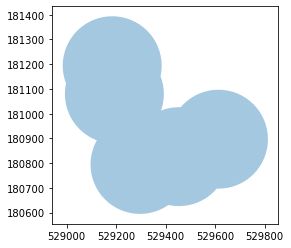

In [170]:
otherBuffsUnion = shapely.ops.unary_union(otherBuffs)
gpd.GeoSeries(otherBuffsUnion).plot(alpha=0.4)

<AxesSubplot:>

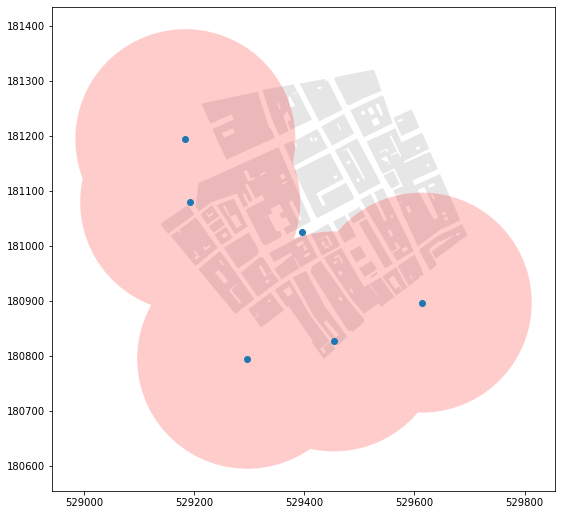

In [171]:
f, ax = plt.subplots(1, figsize=(9, 9))
blocks.plot(ax=ax, facecolor='0.9', linewidth=0)
gpd.GeoSeries(otherBuffsUnion).plot(ax=ax, linewidth=0, facecolor='red', alpha=0.2)
pumps['geometry'].plot(ax=ax)

<AxesSubplot:>

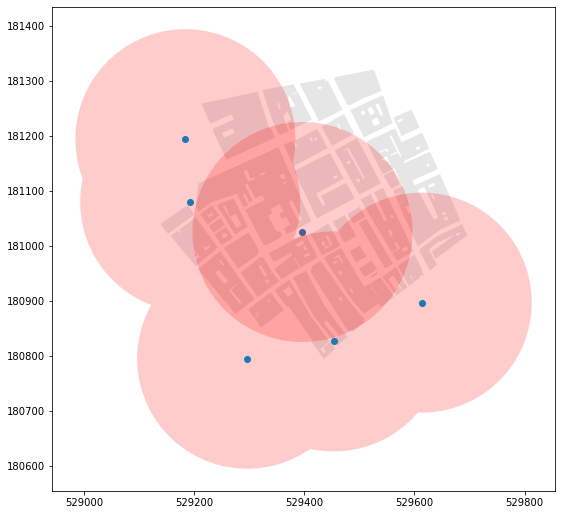

In [173]:
bufA=pumps[pumps['name']=='Broad St Pump']['buffer'].squeeze()

f, ax = plt.subplots(1, figsize=(9, 9))
blocks.plot(ax=ax, facecolor='0.9', linewidth=0)
gpd.GeoSeries(otherBuffsUnion).plot(ax=ax, linewidth=0, facecolor='red', alpha=0.2)
pumps['geometry'].plot(ax=ax)
gpd.GeoSeries(bufA).plot(ax=ax, facecolor='red', alpha=0.2)

<AxesSubplot:>

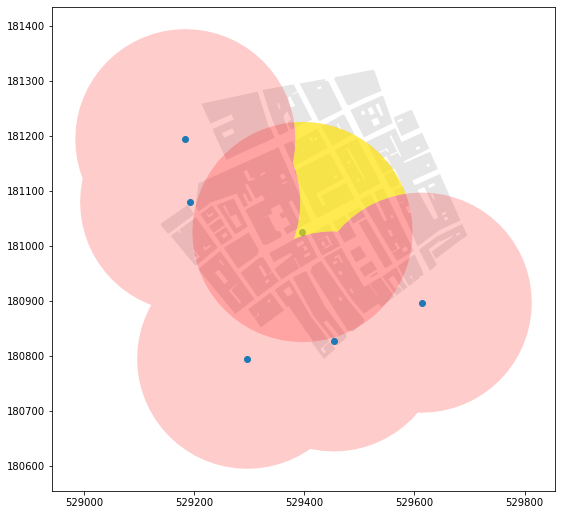

In [179]:
AdiffOBU = bufA.difference(otherBuffsUnion)

f, ax = plt.subplots(1, figsize=(9, 9))
blocks.plot(ax=ax, facecolor='0.9', linewidth=0)
gpd.GeoSeries(otherBuffsUnion).plot(ax=ax, linewidth=0, facecolor='red', alpha=0.2)
pumps['geometry'].plot(ax=ax)
gpd.GeoSeries(bufA).plot(ax=ax, facecolor='red', alpha=0.2)
gpd.GeoSeries(AdiffOBU).plot(ax=ax, facecolor='yellow', alpha=0.6)